<a href="https://colab.research.google.com/github/YaraaShafie/Data-Mining/blob/main/Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hana Hesham

ID: 52-1320

Tutorial: 5

---

Name: Yara Tamer

ID: 52-4365

Tutorial: 5

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-1-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
df['body'].unique()


array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#Removing the $ sign from the selling price to be able to change its data type from object to numeric
df['sellingprice'] = pd.to_numeric(df['sellingprice'].str.replace('$', ''), errors='coerce')

#changing mmr to market report because mmr is not understandable
df = df.rename(columns={'mmr': 'Marketreport'})

#changing color to ExteriorColor because color is not understandable
df = df.rename(columns={'color': 'ExteriorColor'})

#changing vin to VehicleID because vin is not understandable
df = df.rename(columns={'vin': 'VehicleID'})

#changing interior to InteriorColor because interior is not understandable
df = df.rename(columns={'interior': 'InteriorColor'})

#Removing the $ sign from mmr to be able to change its data type from object to numeric
df['Marketreport'] = pd.to_numeric(df['Marketreport'].str.replace('$', ''), errors='coerce')

#Removing the mi from the odometer to be able to change its data type from object to numeric and removing the decimal points
df['odometer'] = df['odometer'].str.replace('mi', '').astype(float).round(0).astype(int)

#calculating the mode for the attribute color and changing every '-' in this attribute with the calculated mode to avoid having any empty values
mode_ExteriorColor = df['ExteriorColor'].mode().values[0]
df['ExteriorColor'] = df['ExteriorColor'].apply(lambda x: mode_ExteriorColor if x == '—' else x)

#calculating the mode for the attribute interior and changing every '-' in this attribute with the calculated mode to avoid having any empty values
mode_InteriorColor = df['InteriorColor'].mode().values[0]
df['InteriorColor'] = df['InteriorColor'].apply(lambda x: mode_InteriorColor if x == '—' else x)

#Renaming all atributes to start with capital letters
df = df.rename(columns={'year': 'Year'})
df = df.rename(columns={'make': 'Make'})
df = df.rename(columns={'model': 'Model'})
df = df.rename(columns={'trim': 'Trim'})
df = df.rename(columns={'body': 'Body'})
df = df.rename(columns={'transmission': 'Transmission'})
df = df.rename(columns={'state': 'State'})
df = df.rename(columns={'condition': 'Condition'})
df = df.rename(columns={'odometer': 'Odometer'})
df = df.rename(columns={'seller': 'Seller'})
df = df.rename(columns={'sellingprice': 'SellingPrice'})
df = df.rename(columns={'saledate': 'SaleDate'})

#capitalizing the first letter in every attribute and all its data except for any numerical attributes and its data and the Body
df['Make'] = df['Make'].str.capitalize()
df['Model'] = df['Model'].str.capitalize()
df['Transmission'] = df['Transmission'].str.capitalize()
df['ExteriorColor'] = df['ExteriorColor'].str.capitalize()
df['InteriorColor'] = df['InteriorColor'].str.capitalize()
df['Seller'] = df['Seller'].str.capitalize()

print(df)




<ipython-input-4-f863142c486f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sellingprice'] = pd.to_numeric(df['sellingprice'].str.replace('$', ''), errors='coerce')
<ipython-input-4-f863142c486f>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Marketreport'] = pd.to_numeric(df['Marketreport'].str.replace('$', ''), errors='coerce')


       Year      Make         Model         Trim          Body Transmission  \
0      2013   Hyundai        Sonata          GLS         sedan    Automatic   
1      2014    Toyota       4runner          SR5           SUV    Automatic   
2      2012     Lexus        Is 250         Base         Sedan    Automatic   
3      2002       Bmw            X5         4.4i           SUV    Automatic   
4      2014      Ford  E-series van        E-250  E-Series Van    Automatic   
...     ...       ...           ...          ...           ...          ...   
46573  2013      Ford          Edge           SE           SUV    Automatic   
46574  2012  Infiniti       G sedan  G37 Journey       g sedan    Automatic   
46575  2013       Bmw      3 series         328i         Sedan    Automatic   
46576  2013    Toyota         Camry           LE         Sedan    Automatic   
46577  2013       Kia           Rio           LX         Sedan    Automatic   

               VehicleID State  Condition  Odometer

In [ ]:
import numpy as np

# Sample array of body types
body_types = ['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
              'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
              'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
              'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
              'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
              'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
              'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
              'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
              'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
              'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
              'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
              'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
              'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
              'beetle convertible', 'TSX Sport Wagon', 'g convertible',
              'tsx sport wagon', 'CTS-V Coupe', 'Q60 Coupe',
              'granturismo convertible', 'cts coupe', 'Transit Van', 'xtracab']

# Mapping dictionary for body types
body_mapping = {
    'sedan': 'Sedan',
    'convertible': 'Convertible',
    'coupe': 'Coupe',
    'koup': 'Coupe',
    'suv': 'SUV',
    'hatchback': 'Hatchback',
    'minivan': 'Minivan',
    'Van': 'Minivan',
    'van': 'Minivan',
    'wagon': 'Wagon',
    'pickup': 'Pickup Truck',
    'cab': 'Pickup Truck',     # Common keyword for pickup trucks (cab types)
    'Cab': 'Pickup Truck',
    'supercrew': 'Pickup Truck',
    'Supercrew': 'Pickup Truck',
    'mega': 'Pickup Truck',
    'pickup': 'Pickup Truck',
    'regular-cab': 'Pickup Truck',
}

# Function to map body types
def map_body_type(body):
    body = body.lower()  # Convert to lowercase for case insensitivity
    for keyword, category in body_mapping.items():
        if keyword in body:
            return category

# Apply mapping to the 'body' column
df['Body'] = df['Body'].apply(map_body_type)

# Print the updated DataFrame
print(df)


       Year      Make         Model         Trim     Body Transmission  \
0      2013   Hyundai        Sonata          GLS    Sedan    Automatic   
1      2014    Toyota       4runner          SR5      SUV    Automatic   
2      2012     Lexus        Is 250         Base    Sedan    Automatic   
3      2002       Bmw            X5         4.4i      SUV    Automatic   
4      2014      Ford  E-series van        E-250  Minivan    Automatic   
...     ...       ...           ...          ...      ...          ...   
46573  2013      Ford          Edge           SE      SUV    Automatic   
46574  2012  Infiniti       G sedan  G37 Journey    Sedan    Automatic   
46575  2013       Bmw      3 series         328i    Sedan    Automatic   
46576  2013    Toyota         Camry           LE    Sedan    Automatic   
46577  2013       Kia           Rio           LX    Sedan    Automatic   

               VehicleID State  Condition  Odometer ExteriorColor  \
0      5npeb4acxdh702805    ma        3.9 

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='ExteriorColor', ylabel='count'>

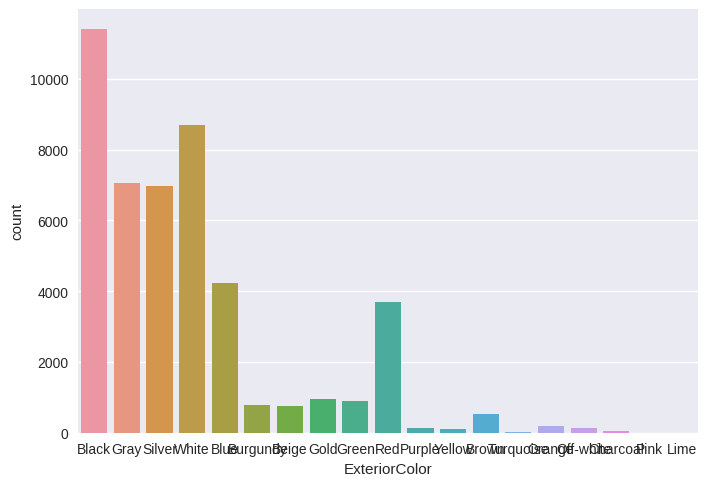

In [ ]:
# Basic, minimal plot example
sns.countplot(x='ExteriorColor', data=df)

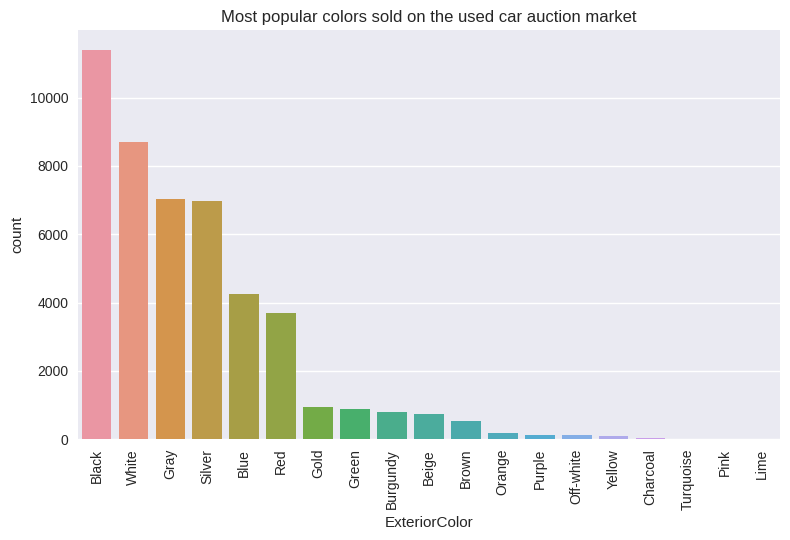

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('ExteriorColor').size().sort_values(ascending=False)
sns.countplot(x='ExteriorColor', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

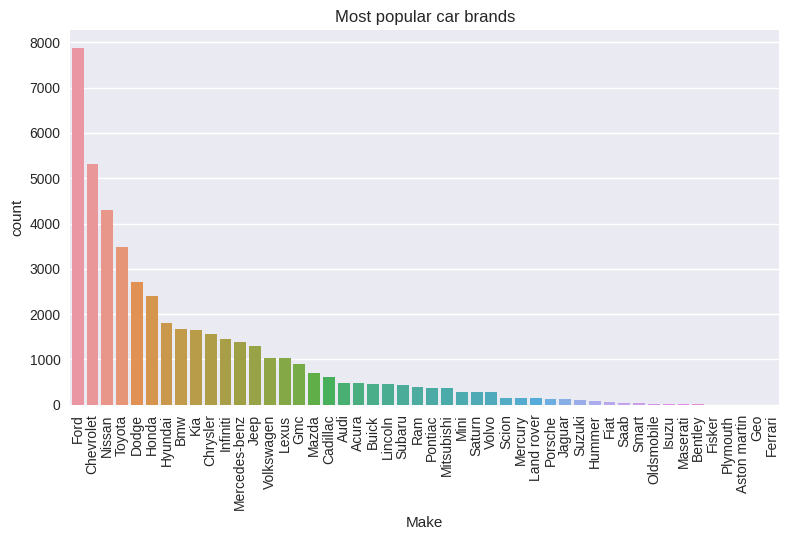

In [ ]:
large_to_small = df.groupby('Make').size().sort_values(ascending=False)
sns.countplot(x='Make', data=df, order=large_to_small.index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The three most popular car brands are: 1.Ford, 2.Chevrolet, 3.Nissan

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

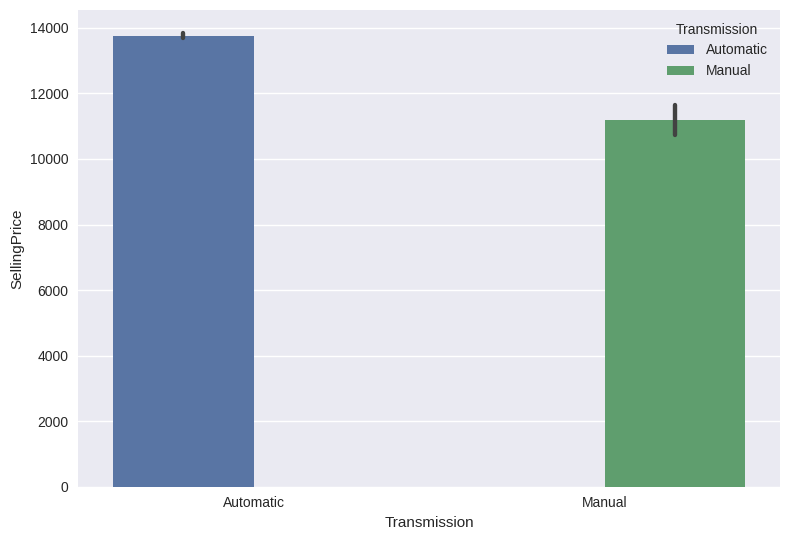

In [ ]:
sns.barplot(df, x='Transmission', y='SellingPrice', hue='Transmission')
plt.xticks(rotation=360)
plt.tight_layout()

**Answer for Q2**: Yes, automatic cars, on average (mean), sell for a higher price than manual cars as according to the bar plot above the automatic cars sell between 12000 and 14000 while the manual cars sell between 10000 and 12000

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

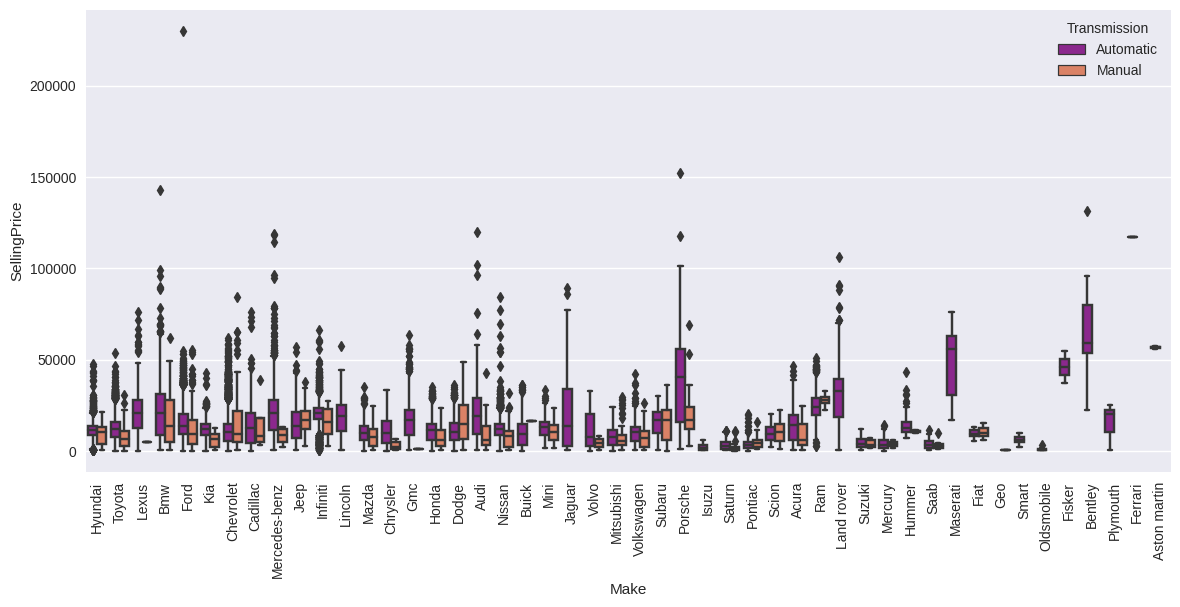

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data= df, x='Make', y='SellingPrice', hue='Transmission',palette='plasma')
plt.xticks(rotation=90)    #to rotate the names of car make on the x axis to be able to see them clearly
plt.show()
# here we created a boxplot to visualize the selling prices of each car company(make)

**Answer for Q3**:Porsche and Bentley have the highest selling prices, and Porsche and Jaguar have the widest distribution

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

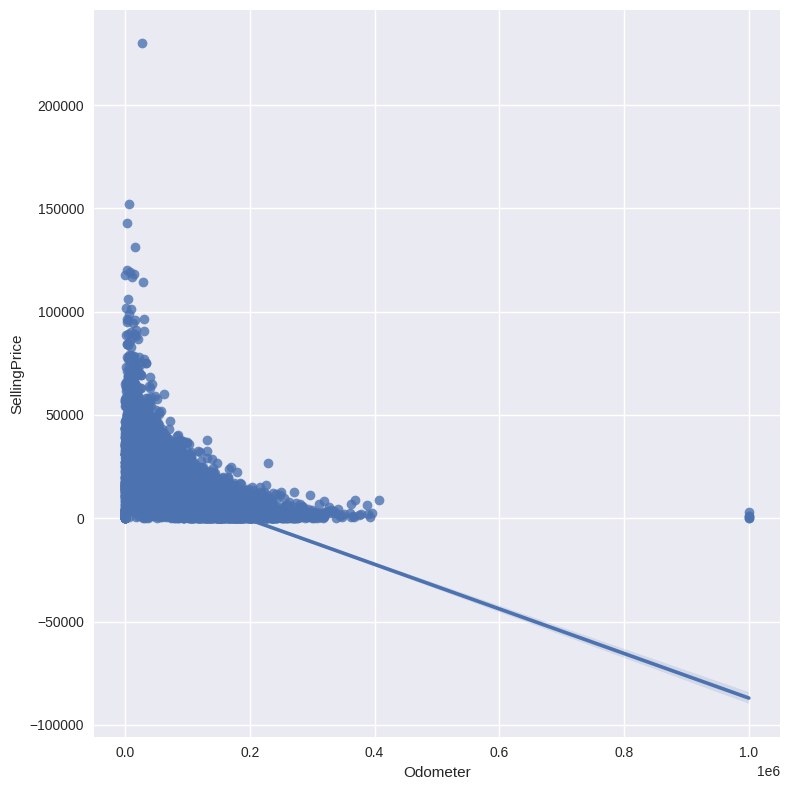

In [ ]:
sns.lmplot(x='Odometer', y='SellingPrice', data=df, palette='magma', height=8);
#created a line of best fit for the scatter plot of selling price in relation to odometer

**Answer for Q4**:Their is a negative relation between the odometer and the selling price; as the more the odometer increases, the less selling price it becomes

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

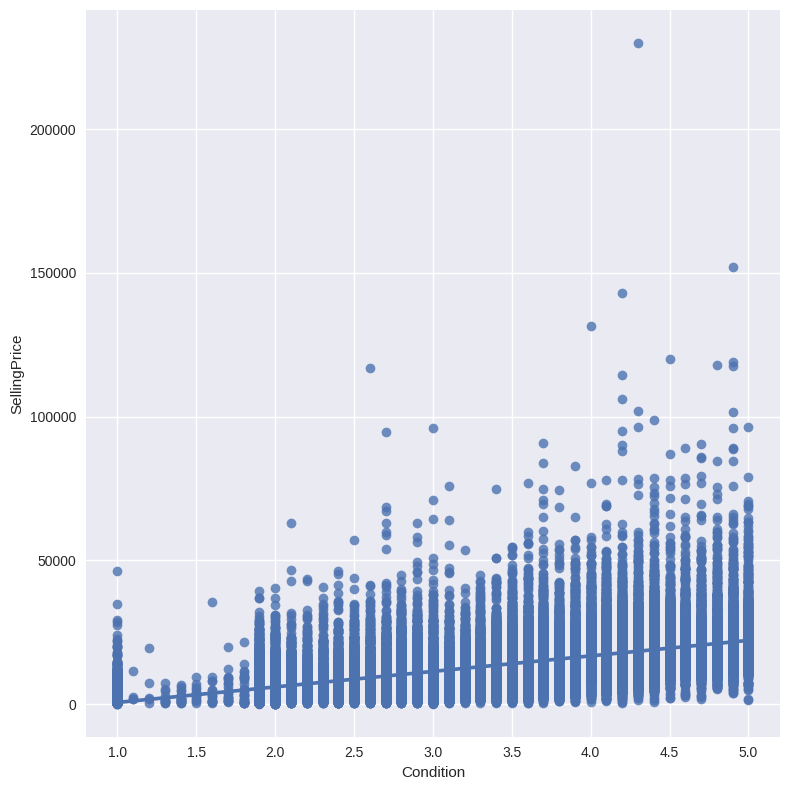

In [ ]:
sns.lmplot(x='Condition', y='SellingPrice', data=df, palette='magma', height=8);
#created a line of best fit for the scatter plot of selling price in relation to car condition

**Answer for Q5**: A positive relation is present between the condition and the selling price. The better the condition(higher value), the higher the selling price gets

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

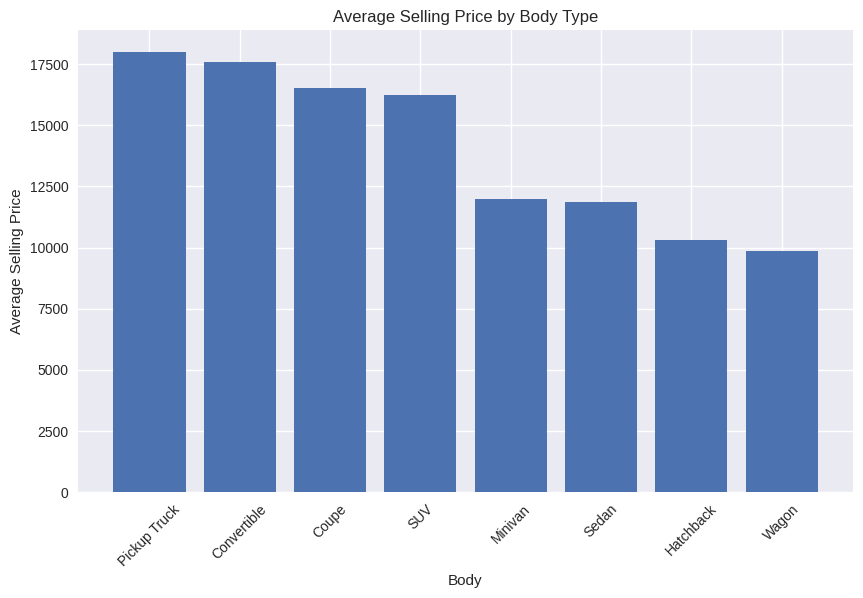

In [ ]:
avg_prices = df.groupby('Body')['SellingPrice'].mean()

# Sort the body types by average price in descending order
sorted_body_types = avg_prices.sort_values(ascending=False).index

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_body_types, avg_prices[sorted_body_types])
plt.xlabel('Body')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Body Type')
plt.xticks(rotation=45)
plt.show()

# Determine the most and least expensive body types
most_expensive = sorted_body_types[0]
least_expensive = sorted_body_types[-1]


**Answer for Q6**: Average selling price changes based on the body type. The most expensive body type is Pickup Truck, and the least expensive body type is Wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
from sklearn.preprocessing import LabelEncoder
#columns to be dropped
df.drop(columns=['VehicleID', 'State','SaleDate','Trim','Seller'], inplace=True)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['Make','Model', 'Transmission', 'ExteriorColor','Body', 'InteriorColor']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now, the categorical variables are transformed into numerical values
print(df)



       Year  Make  Model  Body  Transmission  Condition  Odometer  \
0      2013    18    532     6             0        3.9     50404   
1      2014    45     17     5             0        4.9     17846   
2      2012    25    301     6             0        4.1     21122   
3      2002     4    614     5             0        1.9    145303   
4      2014    13    163     3             0        4.9      6714   
...     ...   ...    ...   ...           ...        ...       ...   
46573  2013    13    170     5             0        3.5     52844   
46574  2012    19    241     6             0        4.5     23185   
46575  2013     4      8     6             0        4.2     45357   
46576  2013    45     91     6             0        3.5     43376   
46577  2013    23    463     6             0        4.1     49953   

       ExteriorColor  InteriorColor  Marketreport  SellingPrice  
0                  1              6         11000         10900  
1                  7              1    

In [ ]:
numerical_columns = ['Year','Make','Model','Transmission','Condition','Odometer','ExteriorColor','Body', 'InteriorColor','Marketreport']

df[numerical_columns] = (

    df[numerical_columns] - df[numerical_columns].min()

) /(

    df[numerical_columns].max() - df[numerical_columns].min()
)


df.head()

,Year,Make,Model,Body,Transmission,Condition,Odometer,ExteriorColor,InteriorColor,Marketreport,SellingPrice
0,0.92,0.382979,0.826087,0.857143,0.0,0.725,0.050403,0.055556,0.400000,0.075184,10900
1,0.96,0.957447,0.026398,0.714286,0.0,0.975,0.017845,0.388889,0.066667,0.196438,29900
2,0.88,0.531915,0.467391,0.857143,0.0,0.775,0.021121,0.833333,0.066667,0.151910,24200
3,0.48,0.085106,0.953416,0.714286,0.0,0.225,0.145302,0.055556,0.066667,0.025004,3200
4,0.96,0.276596,0.253106,0.428571,0.0,0.975,0.006713,0.944444,0.400000,0.153965,22100


In [ ]:
# split data
from sklearn.model_selection import train_test_split

x = df.drop('SellingPrice',axis=1) # Independent variable
y = df['SellingPrice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-514.210923
1,theta_1,Year,-2082.316164
2,theta_2,Make,74.797714
3,theta_3,Model,-45.648093
4,theta_4,Body,-53.254676
5,theta_5,Transmission,-327.233360
6,theta_6,Condition,3898.179452
7,theta_7,Odometer,1753.254399
8,theta_8,ExteriorColor,38.446711
9,theta_9,InteriorColor,36.749671


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  1492.896065311396
R^2 obtained is: 0.9758766911111116


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

The mean absolute percentage error (MAPE) is:  0.1442054200003459
The median absolute error (MAE) is:  688.3396569726574


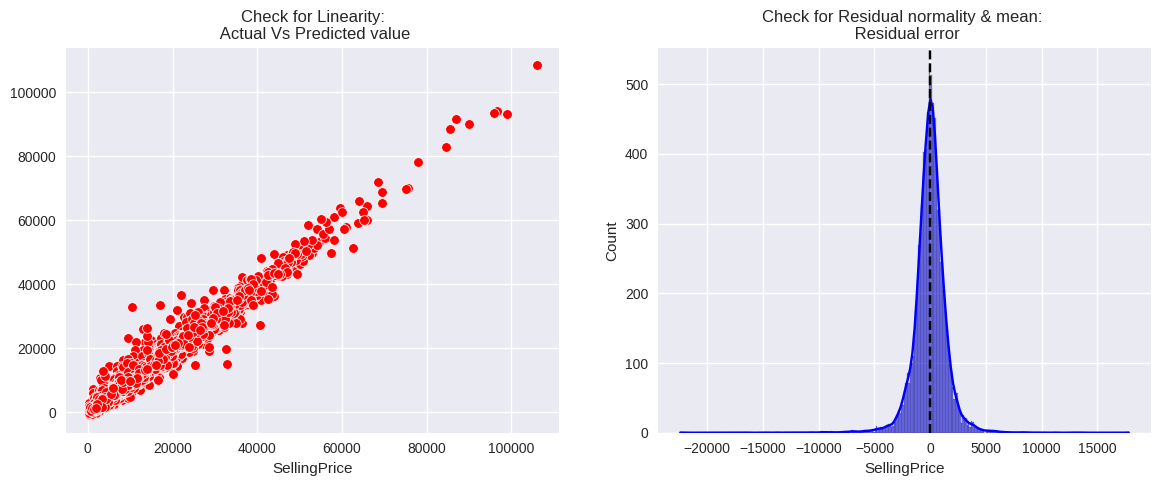

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error');


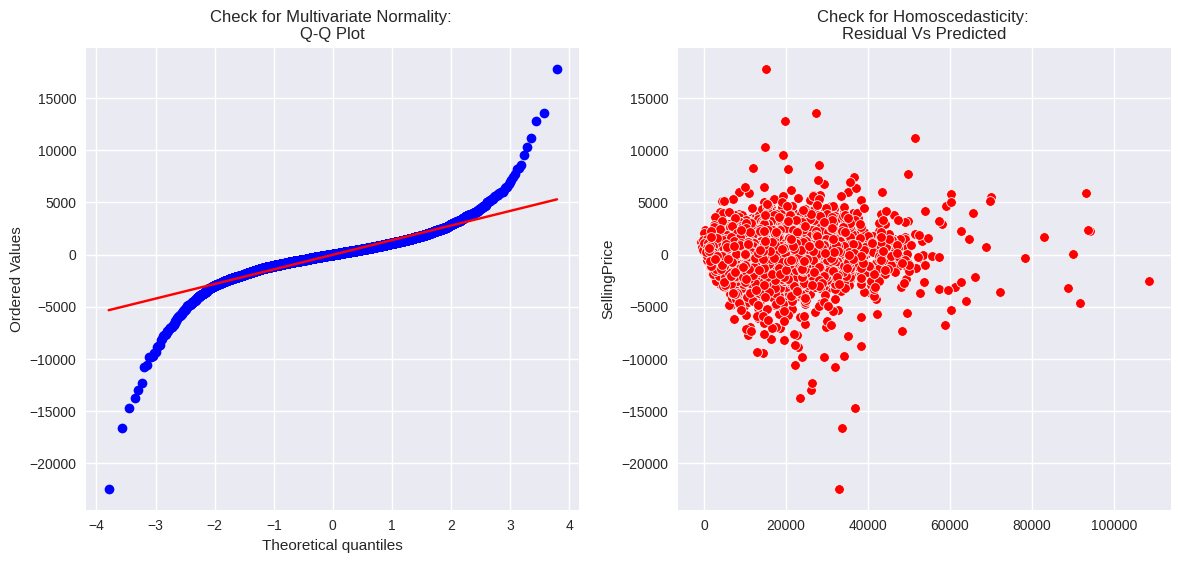

In [ ]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:


R^2 was 0.97 which is greater than 0.95 that is considered sufficient for the needs of any company to explain almost all of the variability of the response data around its mean.

However, if we decide to drop the column Marketreport, the R^2 drops to 0.45 which might be considered as a sufficient number for some companies. Nevertheless, we choose to take the risk of overfitting with R^2 =0.97 rather than let it drop to 0.45, so that we can cover most of the variability in the model. Therefore, we are not going to drop the column Marketreport.

The root mean squared error is around 1493. This tells us that the average deviation between the predicted selling price and the actual selling price is 1,493 dollars.

From the scatter graph, we can conduct that the relationship between the dependent and independent variable is linear.

The residual error plot is normally distributed.

The mean of residual error is close to 0 as much as possible.




# Bonus
Since linear regression is sensitive to outliers and their presence can severely degrade the model’s performance, remove the outliers and train a new linear regression model with the outliers removed. Evaluate and compare the new model’s performance to your previous model that was trained with outliers present in its training data.


In [ ]:
import pandas as pd
from scipy import stats

# Calculate the Z-scores for each data point
z_scores = stats.zscore(df)

# Define a threshold for what you consider an outlier (e.g., 3 standard deviations away)
threshold = 3

# Find the indices of outliers
outliers = (abs(z_scores) > threshold).any(axis=0)

# Get the names of columns with outliers
columns_with_outliers = df.columns[outliers].tolist()
print(columns_with_outliers)






['Year', 'Body', 'Transmission', 'Odometer', 'InteriorColor', 'Marketreport', 'SellingPrice']


This way we figured out that no column has missing values, and the columns ['Year', 'Body', 'Transmission', 'Odometer', 'InteriorColor', 'Marketreport', 'SellingPrice'] contain outliers


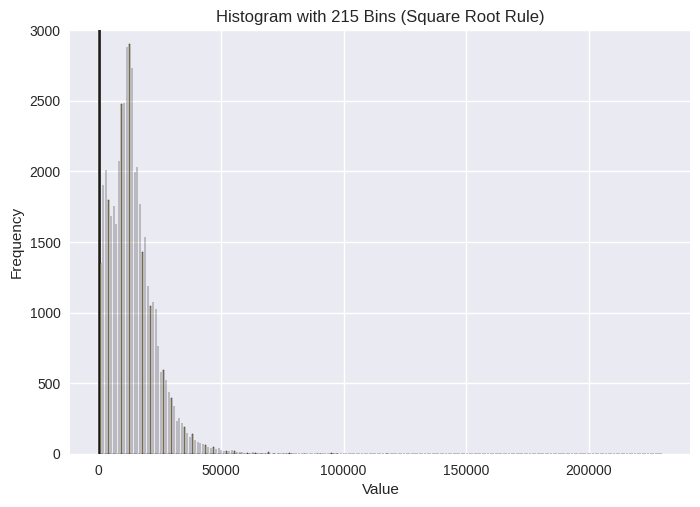

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of bins using the square root rule
n = len(df)
num_bins = int(np.sqrt(n))

# Create a histogram with the determined number of bins
plt.hist(df, bins=num_bins, edgecolor='k')
# Set the y-axis limits (change these values accordingly)
plt.ylim(0, 3000)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram with {num_bins} Bins (Square Root Rule)')
plt.show()


In [ ]:
import pandas as pd
from scipy import stats

# Choose the column and the number of bins
column_name = 'Marketreport'
num_bins = 215

# Define bin boundaries (you can customize this based on your data)
bin_boundaries = pd.cut(df[column_name], bins=num_bins, labels=False)


# Define the threshold for outliers (e.g., 3 standard deviations away from the mean)
z_score_threshold = 3

# Calculate Z-scores for the column
z_scores = stats.zscore(df['Marketreport'])

# Identify outliers based on the threshold
outliers = (abs(z_scores) > z_score_threshold)


# Assign outliers to a specific bin (e.g., highest bin)
bin_boundaries[outliers] = num_bins

# Replace the original column with bin labels or values
df[column_name] = bin_boundaries

# Now, your column has been binned to handle outliers


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  1492.896065311396
R^2 obtained is: 0.9758766911111116


Since we saw earlier that the column Marketreport had the highest effect on the R^2 when we removed it. Therefore, we conducted that this column might contain the most outliers.

We decided to using binning method to handle outliers. First we calculated the number of bins needed using the square root rule. The results showed that we need 215 bins.

After binning, we recalculate the R^2 and the result was 0.53 which is higher than the value we got when we dropped the entire column (0.45) and lower than the value we got when we decided to keep the column as is (0.97).




In [ ]:
# Assuming 'outliers' is a Boolean Series where 'True' represents rows with outliers
columns_with_outliers = df.columns[outliers.any()].tolist()
print(columns_with_outliers)


[['Year', 'Make', 'Model', 'Body', 'Transmission', 'Condition', 'Odometer', 'ExteriorColor', 'InteriorColor', 'Marketreport', 'SellingPrice']]


<ipython-input-24-e8e89242ec16>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  columns_with_outliers = df.columns[outliers.any()].tolist()


Now, as you can see when we tried to print the list of columns containing outliers, it contained nothing because they have been clustered into bins and smoothed by bin means using Z-score method.